# 机器学习作业三
- 姓名：边笛
- 学号：2012668
- 专业：计算机科学与技术

### 实验要求

#### 基本要求：


生成两个各包含 N=1200 个二维随机向量的数据集合 X1 和 X2，数据集合中随机向量来自于三个分布模型，分别满足均值向量 μ1=[1,4],μ2=[4,1], μ3=[8,4] 和协方差矩阵 D1=D2=D3=2I ，其中II是 2∗2的单位矩阵。在生成数据集合 X1 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 X2 时，先验概率如下：p(w1)=0.6, p(w2)=0.1, p(w3)=0.3
   1. 在两个数据集合上分别应用“似然率测试规则” 、“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。
   2. 在两个数据集合上分别应用 h=1 时的方窗核函数或高斯核函数估计方法，应用“似然率测试规则”进行分类实验，计算分类错误率，分析实验结果。

#### 中级要求：
   1. 根据初级要求中使用的一个核函数，在数据集 X2上应用交叉验证法，在 h∈[0.1,0.5,1,1.5,2] 中寻找最优的h值。
   
#### 高级要求
   1. 任选一个数据集，在该数据集上应用k-近邻概率密度估计，任选3个k值输出概率密度分布图。
   

**截止日期：11月4日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 生成数据集

In [2]:
# 生成正态分布数据
def Generate_Sample_Gaussian(mean, cov, P, label):
    '''
        mean 为均值向量
        cov 为方差矩阵
        P 为单个类的先验概率
        return 单个类的数据集
    '''
    temp_num = round(1200 * P)
    #生成多元正态分布矩阵
    x, y = np.random.multivariate_normal(mean, cov, temp_num).T
    
    z = np.ones(temp_num) * label
    X = np.array([x, y, z])
    return X.T

In [3]:
# 画出不同先验对应的散点图
def Generate_DataSet_plot(mean, cov, P):
    
    xx = []
    label = 1
    n = mean.shape[0]
    for i in range(n):
        xx.append(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
        label += 1
        i = i + 1
    # 画图
    plt.figure()
    for i in range(n):
        plt.plot(xx[i][:, 0], xx[i][:, 1], '.', markersize=4.)
        plt.plot(mean[i][0], mean[i][1], 'r*')
    plt.show()
    return xx

In [4]:
def Generate_Data(mean,cov,P1,P2):
    X1 = np.array(Generate_DataSet_plot(mean, cov, P1), dtype=object)
    X2 = np.array(Generate_DataSet_plot(mean, cov, P2), dtype=object)
    X1 = np.vstack(X1)
    X2 = np.vstack(X2)
    return X1,X2

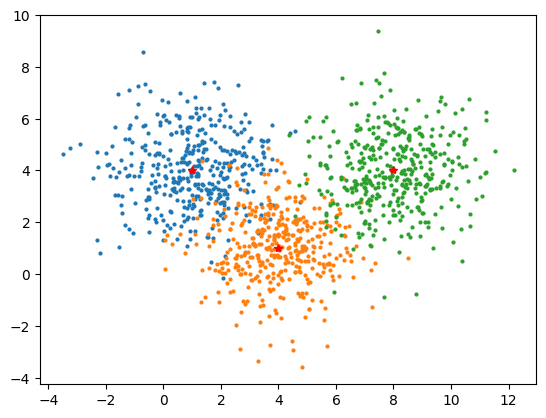

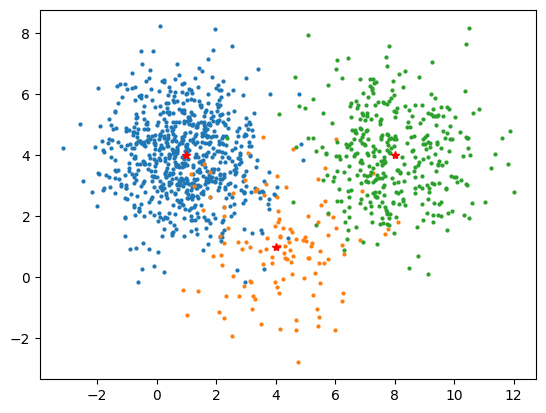

In [5]:
mean = np.array([[1, 4], [4, 1], [8, 4]])  # 正态分布的均值数组
cov = [[2, 0], [0, 2]]  # 正态分布的协方差矩阵
classnum = 3
datanum = 1200
# num = 1200  # 样本个数
P1 = [1 / 3, 1 / 3, 1 / 3]  # 样本X1的先验概率
P2 = [0.6, 0.1, 0.3]  # 样本X2的先验概率
X1,X2 = Generate_Data(mean,cov,P1,P2)

## 初级要求

1. 应用“似然率测试规则” 、“最大后验概率规则” 进行分类实验

    计算分类错误率，分析实验结果


2. 分别应用 h=1 时的方窗核函数或高斯核函数估计方法，应用“似然率测试规则”进行分类实验

    计算分类错误率，分析实验结果

#### 基础要求.1

In [6]:
# 计算高斯概率密度
def Gauss_PDF(X,mean,cov):
    '''
        mean 为均值向量
        cov 为方差矩阵
        X 为数据
        return 高斯概率密度
    '''    
    return 1/(2 * np.pi *np.sqrt(np.linalg.det(cov)))*\
np.exp((-1/2)*np.dot(np.dot((X - mean),np.linalg.inv(cov)), (X - mean)))

In [7]:
#似然率测试规则分类
def MLE(X, mean, cov,P):
    '''
        mean 为均值向量
        cov 为方差矩阵
        P 为单个类的先验概率
        return 错误率
    '''
    class_num = mean.shape[0]#类别个数
    N = np.array(X).shape[0]#数据数
    error_num = 0#错误分类个数
    for i in range(N):
        p_max =0 
        predict = 0
        for j in range(class_num):
            cur_p = Gauss_PDF(X[i][0:2],mean[j],cov)
            #选择似然函数最大的作为最终选择的类别
            if cur_p > p_max :
                predict = j+1
                p_max = cur_p 
        #检查是否分类正确
        if predict != X[i][2]:
            error_num += 1
    return error_num/N

In [8]:
#最大后验概率规则分类
def MAP(X, mean, cov,P):
    '''
        mean 为均值向量
        cov 为方差矩阵
        P 为单个类的先验概率
        return 错误率
    '''
    class_num = mean.shape[0]#类别个数
    N = np.array(X).shape[0]#数据数
    error_num = 0#错误分类个数
    for i in range(N):
        p_max =0 
        predict = 0
        for j in range(class_num):
            cur_p = Gauss_PDF(X[i][0:2],mean[j],cov)*P[j]#MLE乘个先验概率
            #选择后验概率最大的作为最终选择的类别
            if cur_p > p_max :
                predict = j+1
                p_max = cur_p 
        #检查是否分类正确
        if predict != X[i][2]:
            error_num += 1
    return error_num/N   

In [9]:
MaxLikelihood1 = MLE(X1, mean, cov, P1)
MaxLikelihood2 = MLE(X2, mean, cov, P2)
MaxPosterior1 = MAP(X1, mean, cov, P1)
MaxPosterior2 = MAP(X2, mean, cov, P2)

In [10]:
print("Error Rate   MaxLikelihood   MaxPosterior")
print("  X1  \t{}  \t{}".format( round(MaxLikelihood1,4) ,round(MaxPosterior1,4)))
print("  X2  \t{}  \t{}".format( round(MaxLikelihood2,4) ,round(MaxPosterior2,4)))

Error Rate   MaxLikelihood   MaxPosterior
    X1    	0.0617    	0.0617
    X2    	0.065    	0.0458


### 分析

根据计算结果可以看到，在两个数据集合上分别应用“似然率测试规则” 、“最大后验概率规则”进行分类实验，对于X1数据来说分类效果是一样的，但对于X2数据来说，“最大后验概率规则”分类效果要更好一些

究其原因，是在生成数据时，X1数据集的每一类的先验概率相等，而X2数据集每一类的先验概率不等。“最大后验”与“极大似然”相比，区别在于最大后验概率函数是在高斯概率密度也就是极大似然函数后乘上了先验概率。如果对于每个类别来说先验概率都相同，那乘与不乘对于函数最大值的对应分类没有影响。

对于X2数据，“最大后验概率规则”效果更好，说明不同类别个数差异，对于预测结果还是有很大指导意义的，在分类是应考虑到每个类别出现概率的差异性。

#### 基础要求.2

In [11]:
#高斯窗口核函数密度
def Gauss_KDE(x, g, h):
    '''
        x 为待分类点坐标
        g 为训练数据坐标
        H 为窗口大小
        return 高斯窗口核函数密度
    '''   
    return (1 / (np.sqrt(2 * np.pi) * h)) * \
np.array([np.exp(-0.5 * np.dot(x - g[i], x - g[i]) / (h**2)) \
          for i in range(len(g))]).mean()

In [12]:
#方窗核函数密度
def Window_KDE(x,g,h):
    '''
        x 为待分类点坐标
        g 为训练数据坐标
        H 为窗口大小
        维度 D = 2
        return 高斯窗口核函数密度
    '''    
    N = g.shape[0]
    #距离
    G = np.sqrt((np.sum(((g - x)**2),axis=1)).astype('float'))
    K = np.zeros(N)
    index = 0
    for i in list(G):
        if (i/h) <= 0.5:
            K[index] = 1
        index+=1
    return (1/N)*(np.sum(K/(np.power(h,2))))


In [13]:
def gauss_kernel_MLE(X,X_train,h):
    '''
        X 为待分类数据
        X_train 为用于训练的数据
        h 为窗口大小
        return 错误个数
    '''
    class_num = mean.shape[0]#类别个数
    N = len(X)#数据数
    error_num = 0#错误分类个数
    for i in range(N):
        p_max =0 
        predict = 0
        for j in range(class_num):
            #计算高斯核函数密度
            cur_p = Gauss_KDE(X[i][0:2],X_train[j][:,0:2],h)
            #选择密度最大的作为类别
            if cur_p > p_max :
                predict = j+1
                p_max = cur_p 
        #检查是否分类正确
        if predict != X[i][2]:
            error_num += 1
    return error_num


In [14]:
def window_kernel_MLE(X,X_train,h):
    '''
        X 为待分类数据
        X_train 为用于训练的数据
        h 为窗口大小
        return 错误个数
    '''
    class_num = mean.shape[0]#类别个数
    N = X.shape[0]#数据数
    error_num = 0#错误分类个数
    for i in range(N):
        p_max =0 
        predict = 0
        for j in range(class_num):
            #计算方窗核函数密度
            cur_p = Window_KDE(X[i][0:2],X_train[j][:,0:2],h)
            #选择密度最大的作为类别
            if cur_p > p_max :
                predict = j+1
                p_max = cur_p 
        #检查是否分类正确
        if predict != X[i][2]:
            error_num += 1
    return error_num

In [15]:
#获得按类别区分开来的训练数据
train1=[]
train2=[]
start1=start2=0
for i in range(classnum):   
    train1.append(X1[int(start1):int(start1+datanum*P1[i])])
    train2.append(X2[int(start2):int(start2+datanum*P2[i])])
    start1+=datanum*P1[i]
    start2+=datanum*P2[i]
    

In [16]:
gauss_kernel_MaxLikelihood1 = gauss_kernel_MLE(X1, train1, 1)
gauss_kernel_MaxLikelihood2 = gauss_kernel_MLE(X2, train2, 1)
window_kernel_MaxLikelihood1 = window_kernel_MLE(X1, train1, 1)
window_kernel_MaxLikelihood2 = window_kernel_MLE(X2, train2, 1)

In [17]:
print("Error Rate  \t{}  \t{}  \t{}".format("Window","Gauss","Likelihood"))
print("  X1  \t{}  \t{}  \t{}".format( round(window_kernel_MaxLikelihood1/datanum,4) ,\
                                        round(gauss_kernel_MaxLikelihood1/datanum,4),\
                                      round(MaxLikelihood1,4),))
print("  X2  \t{}  \t{}  \t{}".format( round(window_kernel_MaxLikelihood2/datanum,4) ,\
                                        round(gauss_kernel_MaxLikelihood2/datanum,4),\
                                      round(MaxLikelihood2,4)))

Error Rate    	Window    	Gauss    	Likelihood
    X1    	0.0567    	0.0592    	0.0617
    X2    	0.0617    	0.06    	0.065


### 分析

在窗口大小为1时，对方窗核函数和高斯核函数估计方法，分别应用“似然概率规则”进行分类实验，发现对于应用核函数后分类正确率有所提高。还发现，对于数据集X1方窗核函数估计优于高斯核函数，但对于数据集X2高斯核函数估计优于方窗核函数。还有不论使用什么方法，X1数据集的分类准确率都是低于X2的。


核密度估计法是一种通过某个（连续的）概率分布的样本来估计这个概率分布的密度函数的方法，它能比较平滑地估计未知分布概率密度。高斯核函数相比于方窗核函数，有更好的光滑性，可以降低方差，有利于更准确的预测。

## 中级要求

根据初级要求中使用的一个核函数，在数据集 X2上应用交叉验证法，在 h∈[0.1,0.5,1,1.5,2] 中寻找最优的h值。

In [18]:
#划分数据集，采用分层交叉验证
train1[1]
X1_group=[[],[],[]]
X2_group=[[],[],[]]
#测试集：训练集 = 1：9
#分层十等分X2

#逐一处理每个类别
for i in range(3):
    i2 = 0
    step2 = len(train2[i])*0.1
    #十等分
    for j in range(10): 
        X2_group[i].append(train2[i][int(i2):int(i2+step2),:])
        i2 += step2


In [19]:
#窗口大小序列
test_h = [0.1, 0.5, 1, 1.5, 2]
#记录错误分类数
error_num_testh=[0,0,0,0,0]
#十等分后的每一小份逐一做测试集
for i in range(10): 
    error_num = 0
    X2_train = []
    #将测试集连接成数据
    X2_test = np.vstack((X2_group[0][i],X2_group[1][i],X2_group[2][i]))
    #不同类别的训练集单独制作
    for j in range(3):
        #连接余下9组做训练集
        if i==0:
            t=1
        if i!=0:
            t=0
        
        train = X2_group[j][t]
        for k in range(10):
            if k !=i and k != t:
                train = np.vstack((train,X2_group[j][k]))
        X2_train.append(train)
    #得到按类别分开的训练集X2_train
    index_h = 0
    #依次测试每个窗口大小test_h,记录错误分类数
    for H in test_h:  
        error_num_testh[index_h] += gauss_kernel_MLE(X2_test, X2_train, H)
        index_h += 1

In [20]:
#输出结果
print("\t{}    \t{}".format("h","Error Rate"))
for i in range(len(test_h)):
    print("\t{}    \t{}".format(test_h[i],round(error_num_testh[i]/datanum,4)))

	h    	Error Rate
	0.1    	0.0883
	0.5    	0.0667
	1    	0.0608
	1.5    	0.06
	2    	0.0592


### 分析

通过实验结果可以看到，对于给出的窗口大小，h越大，错误率越低，最优的h为2 ,但实际上h=1，1.5，2的结果差异并不大

## 高级要求

任选一个数据集，在该数据集上应用k-近邻概率密度估计，任选3个k值输出概率密度分布图

In [21]:
#k-近邻概率密度估计
def Kneibor_Eval(X, k):
    '''
        X 为待分类数据
        k 为k值
        return 概率密度函数
    '''    
    num = len(X)
    Xtrain = np.array(X)
    # 生成200*200=40000个采样点，每个采样点对应三类的不同概率
    p = np.zeros((200, 200, 3))
    # 在[-5,15]的范围内，以0.1为步长估计概率密度 区间长度200步
    for i in np.arange(0, 200):
        for j in np.arange(0, 200):
            '''
            # 生成标准差距离
            # 根据第k个数据点的位置计算V
            # 找到前k个数据点的类别,分别加到对应类的权重上
            # 计算每个采样点的概率密度函数
            '''
            cur = np.array([-5.05+0.1*i,-5.05+0.1*j]) 
            #标准差距离
            distance=np.sqrt((np.sum(((Xtrain[:,0:2]-cur)**2),axis=1)).astype('float'))
            #类别标签
            label = Xtrain[:,2:3]
            #合成 距离-标签 数据
            Xdata = np.squeeze(np.dstack((distance,np.squeeze(label))))
            #按距离大小排序
            Xdata = Xdata[np.argsort(Xdata[:,0])]
            #第k个点的类别
            numer_K = Xdata[k-1][0]
            #根据第k个点计算区域与大小V
            V = ((numer_K)**2)*np.pi
            #对前k项分类情况计数
            count=[0,0,0]
            for kk in range(k):
                count[int(Xdata[kk][1]-1)] += 1
            #计算条件密度    
            for ii in range(3):
                p[i][j][ii] = (count[ii]/V)/400
    return p

### 绘制概率密度分布图示例

In [22]:
#绘出结果
def plot_result(p,k):
    X,Y = np.mgrid[-5:15:200j, -5:15:200j]

    Z0 = p[:, :, 0]
    Z1 = p[:, :, 1]
    Z2 = p[:, :, 2]

    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot(1, 3, 1,projection='3d')
    ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
    ax.set_title('sample:X1, k={}, label:0'.format(k))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 2,projection='3d')
    ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
    ax.set_title('sample:X1, k={}, label:0'.format(k))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 3,projection='3d')
    ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
    ax.set_title('sample:X1, k={}, label:0'.format(k))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

#### 在X1数据集上应用k近邻概率密度估计，输出k值为10，20，30，40，50的概率密度分布图

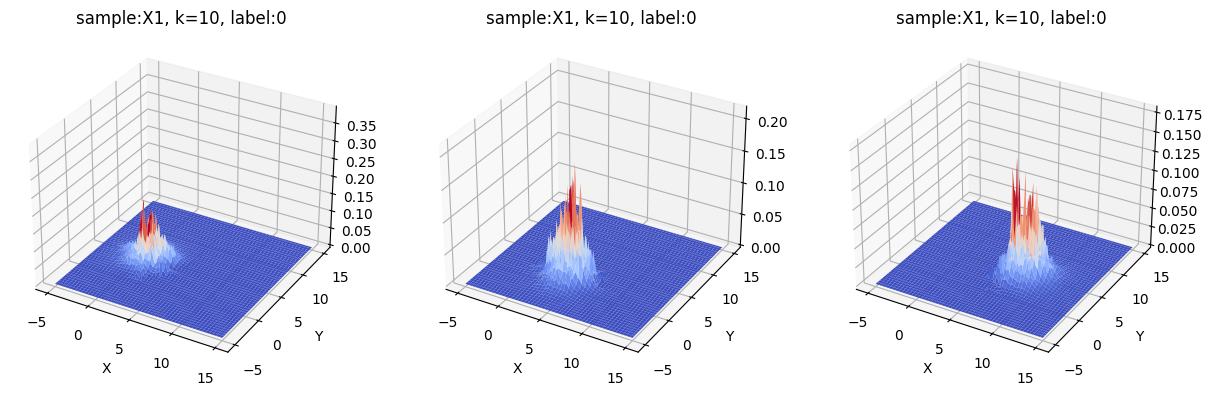

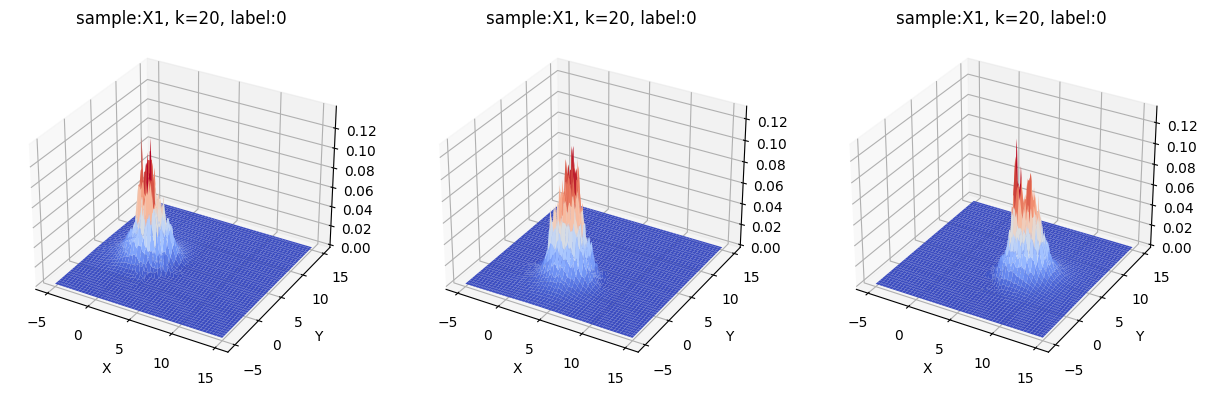

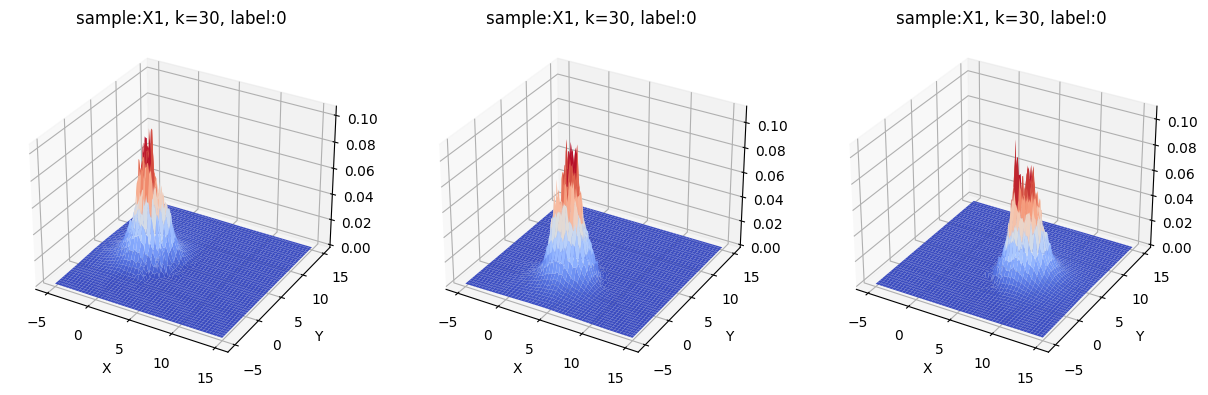

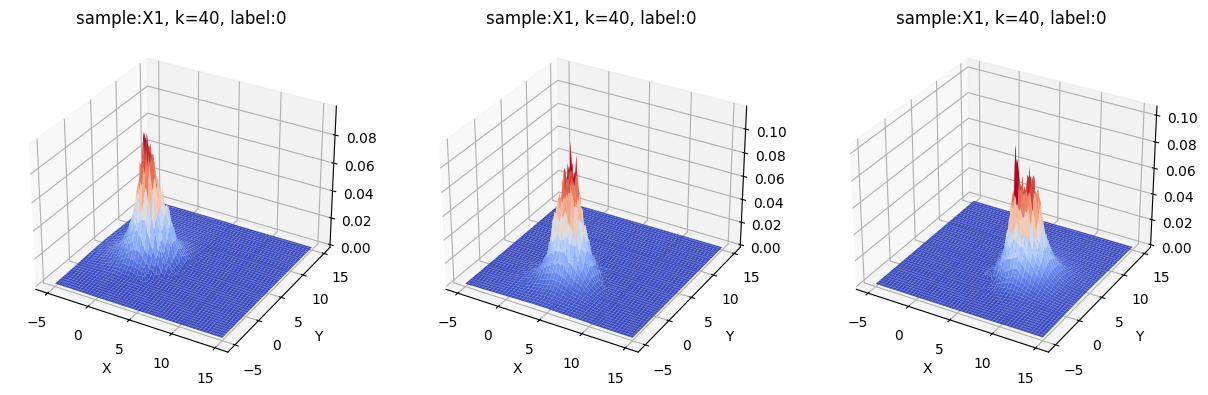

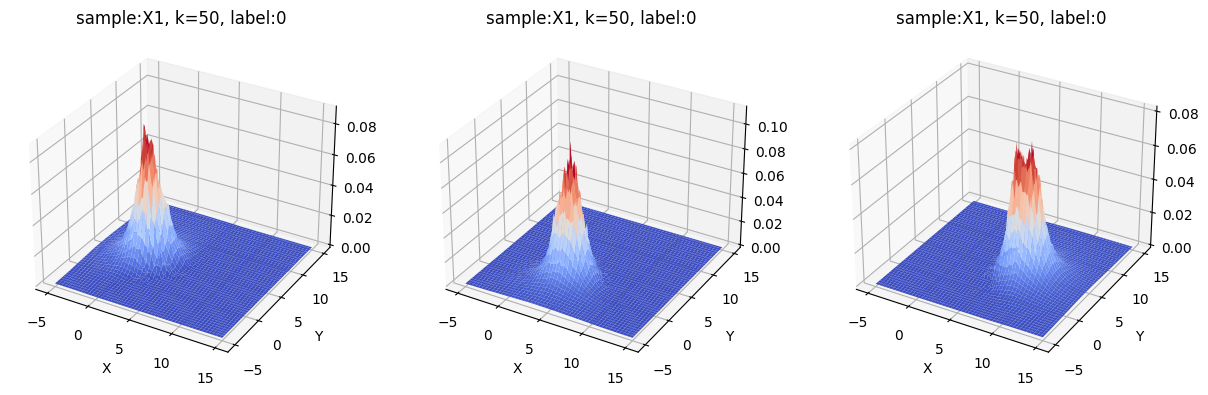

In [23]:



#选取的k值序列
K = [10,20,30,40,50]
#依次测试每个k值并绘图
for curk in K:
    curp = Kneibor_Eval(X1,curk)
    plot_result(curp,curk)
    
    
    
    